
# Load dataset


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from google.colab import files

df = pd.read_csv('/content/TINGKAT STRESS KADET.csv')
df.head()

,Umur,Cohort,Jenis Kelamin,IPS Semester sebelumnya,Jumlah tugas perminggu,Organisasi yang diikuti,UKM Wajib yang diikuti,Durasi tidur malam (jam),Frekuensi olahraga/minggu,Kebiasaan makan sehat (skala 1-6),...,"Selama sebulan terakhir, seberapa sering anda merasa segala sesuatu yang terjadi sesuai dengan harapan anda?","Dalam sebulan terakhir, seberapa sering Anda merasa bahwa Anda tidak mampu menyelesaikan hal-hal yang harus dikerjakan ?","Selama sebulan terakhir, seberapa sering anda mampu mengontrol rasa mudah tersinggung dalam kehidupan anda?","Selama sebulan terakhir, seberapa sering anda merasa lebih mampu mengatasi masalah jika dibandingkan dengan orang lain?","Dalam sebulan terakhir, seberapa sering Anda merasa marah karena hal-hal di luar kendali Anda?","Dalam sebulan terakhir, seberapa sering Anda merasa bahwa kesulitan Anda menumpuk sehingga Anda tidak dapat mengatasinya?",Kebiasaan meditasi/relaksasi,Total uang dari Orang Tua,Uang Saku Kadet Unhan,Prodi
0,20,5,Perempuan,4.0,10,Tak ada,Calon Genderang Suling,3.0,7.0,5,...,2,1,2,2,2,2,TIDAK,1000000,630,KEDOKTERAN
1,18,5,Perempuan,4.0,4,Humas,Calon Genderang Suling,4.0,3.0,4,...,2,2,3,2,3,1,TIDAK,500,630,INFORMATIKA
2,20,5,Perempuan,4.0,8,Tak ada,Paduan Suara,6.0,7.0,4,...,3,2,2,2,2,2,YA,500,630,KEDOKTERAN
3,19,5,Laki-Laki,4.0,8,Tak ada,Paduan Suara,5.0,7.0,4,...,2,1,2,2,2,2,TIDAK,350,630,KEDOKTERAN
4,19,5,Laki-Laki,4.0,8,Rohis,Calon Genderang Suling,4.0,7.0,4,...,2,3,2,1,3,3,TIDAK,200,630,KEDOKTERAN


#Definisikan PSS 10 dan Feature Engginering
## Kode ini untuk mendapatkan label target yaitu stress_level


In [ ]:
pss_cols = [
    'Selama sebulan terakhir, seberapa sering anda marah karena sesuatu yang tidak terduga terjadi?  ',
    'Dalam sebulan terakhir, seberapa sering Anda merasa tidak mampu mengendalikan hal-hal penting dalam hidup Anda?  ',
    'Dalam sebulan terakhir, seberapa sering Anda merasa gelisah atau tegang?  ',
    ' Selama sebulan terakhir, seberapa sering anda merasa yakin terhadap kemampuan diri untuk mengatasi masalah pribadi  ?',
    'Selama sebulan terakhir, seberapa sering anda merasa segala sesuatu yang terjadi sesuai dengan harapan anda? ',
    'Dalam sebulan terakhir, seberapa sering Anda merasa bahwa Anda  tidak mampu menyelesaikan hal-hal yang harus dikerjakan  ?  ',
    'Selama sebulan terakhir, seberapa sering anda mampu mengontrol rasa mudah tersinggung dalam kehidupan anda?',
    'Selama sebulan terakhir, seberapa sering anda merasa lebih mampu mengatasi masalah jika dibandingkan dengan orang lain?',
    'Dalam sebulan terakhir, seberapa sering Anda merasa marah karena hal-hal di luar kendali Anda?  ',
    'Dalam sebulan terakhir, seberapa sering Anda merasa bahwa kesulitan Anda menumpuk sehingga Anda tidak dapat mengatasinya?  '
]

reverse_pss = [pss_cols[i] for i in [3, 4, 6, 7]]

for col in reverse_pss:
    df[col] = 4 - df[col]

df['pss_score'] = df[pss_cols].sum(axis=1)
df['stress_level'] = df['pss_score'].apply(lambda x: 'rendah' if x <= 13 else ('sedang' if x <= 26 else 'tinggi'))
df.head()

,Umur,Cohort,Jenis Kelamin,IPS Semester sebelumnya,Jumlah tugas perminggu,Organisasi yang diikuti,UKM Wajib yang diikuti,Durasi tidur malam (jam),Frekuensi olahraga/minggu,Kebiasaan makan sehat (skala 1-6),...,"Selama sebulan terakhir, seberapa sering anda mampu mengontrol rasa mudah tersinggung dalam kehidupan anda?","Selama sebulan terakhir, seberapa sering anda merasa lebih mampu mengatasi masalah jika dibandingkan dengan orang lain?","Dalam sebulan terakhir, seberapa sering Anda merasa marah karena hal-hal di luar kendali Anda?","Dalam sebulan terakhir, seberapa sering Anda merasa bahwa kesulitan Anda menumpuk sehingga Anda tidak dapat mengatasinya?",Kebiasaan meditasi/relaksasi,Total uang dari Orang Tua,Uang Saku Kadet Unhan,Prodi,pss_score,stress_level
0,20,5,Perempuan,4.0,10,Tak ada,Calon Genderang Suling,3.0,7.0,5,...,2,2,2,2,TIDAK,1000000,630,KEDOKTERAN,16,sedang
1,18,5,Perempuan,4.0,4,Humas,Calon Genderang Suling,4.0,3.0,4,...,1,2,3,1,TIDAK,500,630,INFORMATIKA,19,sedang
2,20,5,Perempuan,4.0,8,Tak ada,Paduan Suara,6.0,7.0,4,...,2,2,2,2,YA,500,630,KEDOKTERAN,21,sedang
3,19,5,Laki-Laki,4.0,8,Tak ada,Paduan Suara,5.0,7.0,4,...,2,2,2,2,TIDAK,350,630,KEDOKTERAN,18,sedang
4,19,5,Laki-Laki,4.0,8,Rohis,Calon Genderang Suling,4.0,7.0,4,...,2,3,3,3,TIDAK,200,630,KEDOKTERAN,28,tinggi


#Koreksi Feature IPS dan Feature Engginer Pendapatan

In [ ]:

df['IPS Semester sebelumnya'] = df['IPS Semester sebelumnya'].apply(lambda x: float(str(x).replace(',', '.')) / 100 if float(str(x).replace(',', '.')) > 4 else float(str(x).replace(',', '.')))

df['Total uang dari Orang Tua'] = df['Total uang dari Orang Tua'].apply(lambda x: x * 1000 if x < 50000 else x)

def hitung_pendapatan(row):
    cohort = row['Cohort']
    uang_saku = 777000 if cohort == 4 else 630000 if cohort == 5 else 0
    return row['Total uang dari Orang Tua'] + uang_saku

df['Pendapatan'] = df.apply(hitung_pendapatan, axis=1)
df.tail()


,Umur,Cohort,Jenis Kelamin,IPS Semester sebelumnya,Jumlah tugas perminggu,Organisasi yang diikuti,UKM Wajib yang diikuti,Durasi tidur malam (jam),Frekuensi olahraga/minggu,Kebiasaan makan sehat (skala 1-6),...,"Selama sebulan terakhir, seberapa sering anda merasa lebih mampu mengatasi masalah jika dibandingkan dengan orang lain?","Dalam sebulan terakhir, seberapa sering Anda merasa marah karena hal-hal di luar kendali Anda?","Dalam sebulan terakhir, seberapa sering Anda merasa bahwa kesulitan Anda menumpuk sehingga Anda tidak dapat mengatasinya?",Kebiasaan meditasi/relaksasi,Total uang dari Orang Tua,Uang Saku Kadet Unhan,Prodi,pss_score,stress_level,Pendapatan
171,19,5,Perempuan,3.00,5,Tak ada,Orkestra,6.0,3.0,4,...,2,1,1,TIDAK,0,6.300.000,MATEMATIKA,17,sedang,630000
172,19,5,Laki-Laki,3.60,6,Tak ada,Orkestra,4.0,3.0,5,...,2,2,2,TIDAK,500000,630000,KEDOKTERAN,16,sedang,1130000
173,20,4,Perempuan,3.75,5,Polisi Kadet,Calon Genderang Suling,5.0,2.0,5,...,1,2,1,TIDAK,1000000,777,BIOLOGI,14,sedang,1777000
174,19,5,Laki-Laki,3.48,4,Tak ada,Calon Genderang Suling,3.0,3.0,5,...,2,3,3,TIDAK,200000,660,KEDOKTERAN,20,sedang,830000
175,21,4,Laki-Laki,4.00,4,Rohis,Calon Genderang Suling,4.0,3.0,5,...,1,1,1,YA,1000000,777000,KIMIA,8,rendah,1777000


In [ ]:
print(df.columns.tolist())

['Umur', 'Cohort', 'Jenis Kelamin', 'IPS Semester sebelumnya', 'Jumlah tugas perminggu', 'Organisasi yang diikuti', 'UKM Wajib yang diikuti', 'Durasi tidur malam (jam)', 'Frekuensi olahraga/minggu', 'Kebiasaan makan sehat (skala 1-6)', 'Selama sebulan terakhir, seberapa sering anda marah karena sesuatu yang tidak terduga terjadi?  ', 'Dalam sebulan terakhir, seberapa sering Anda merasa tidak mampu mengendalikan hal-hal penting dalam hidup Anda?  ', 'Dalam sebulan terakhir, seberapa sering Anda merasa gelisah atau tegang?  ', ' Selama sebulan terakhir, seberapa sering anda merasa yakin terhadap kemampuan diri untuk mengatasi masalah pribadi  ?', 'Selama sebulan terakhir, seberapa sering anda merasa segala sesuatu yang terjadi sesuai dengan harapan anda? ', 'Dalam sebulan terakhir, seberapa sering Anda merasa bahwa Anda  tidak mampu menyelesaikan hal-hal yang harus dikerjakan  ?  ', 'Selama sebulan terakhir, seberapa sering anda mampu mengontrol rasa mudah tersinggung dalam kehidupan and

#Visualisasi Heatmap

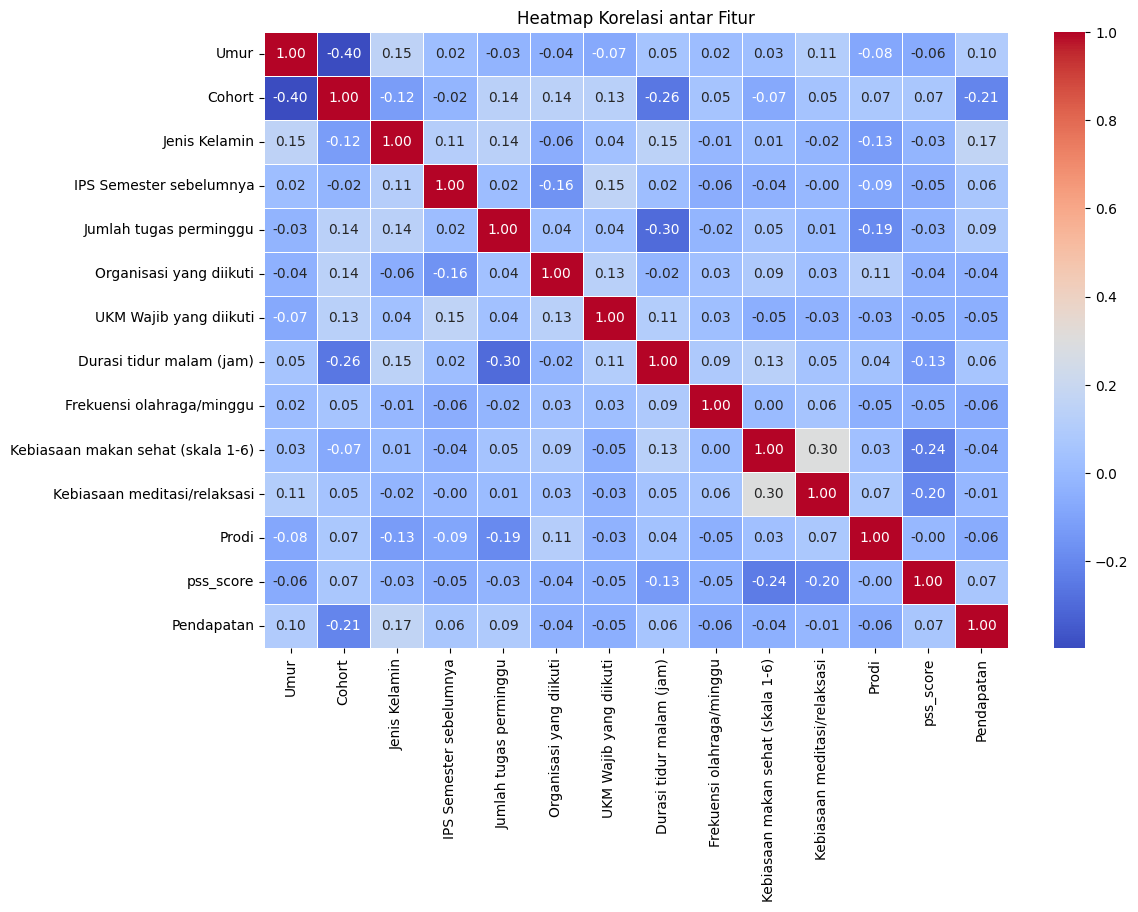

In [ ]:
import seaborn as sns

# Drop kolom pertanyaan PSS, stress_level, dan Total uang dari Orang Tua
df_corr = df.drop(columns=pss_cols + ['stress_level', 'Total uang dari Orang Tua','Uang Saku Kadet Unhan'])

# Encode kolom kategorikal (jika ada)
for col in df_corr.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_corr[col] = le.fit_transform(df_corr[col])

# Hitung korelasi
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi antar Fitur')
plt.show()


#EDA Feature Penting

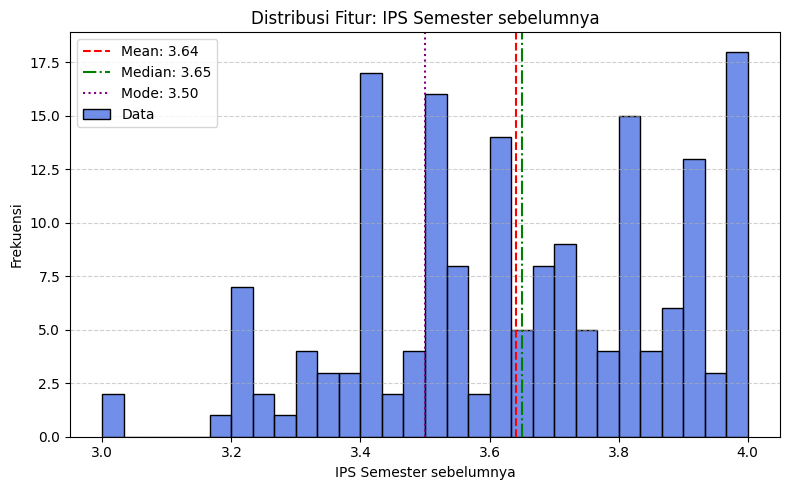

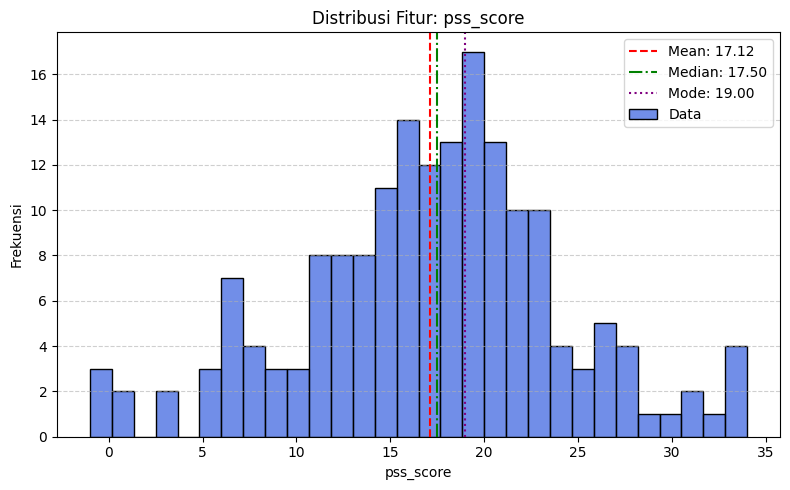

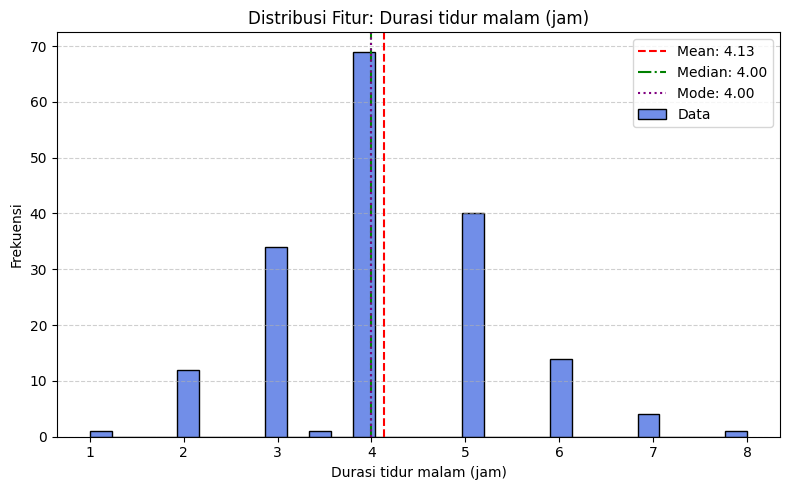

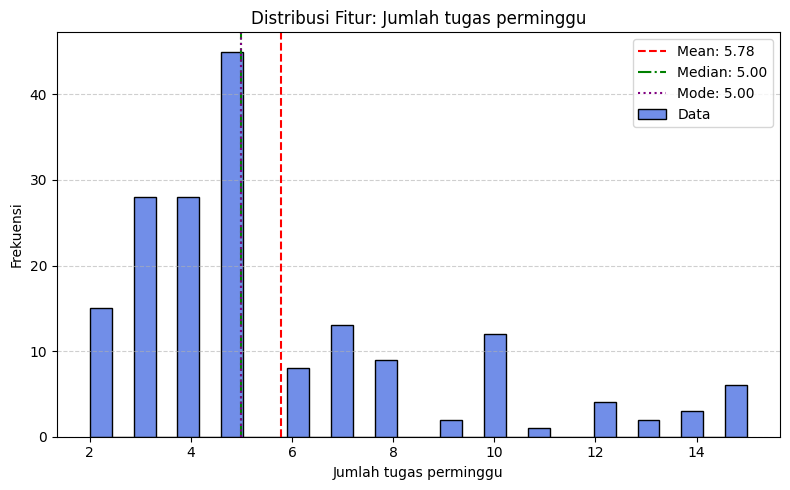

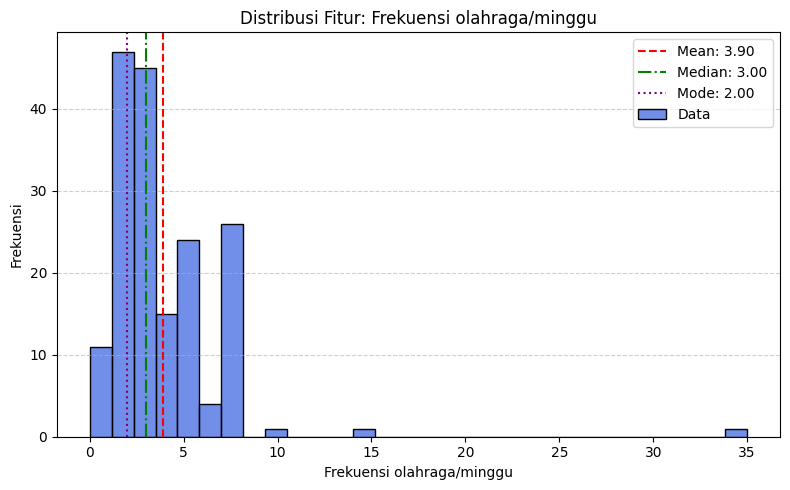

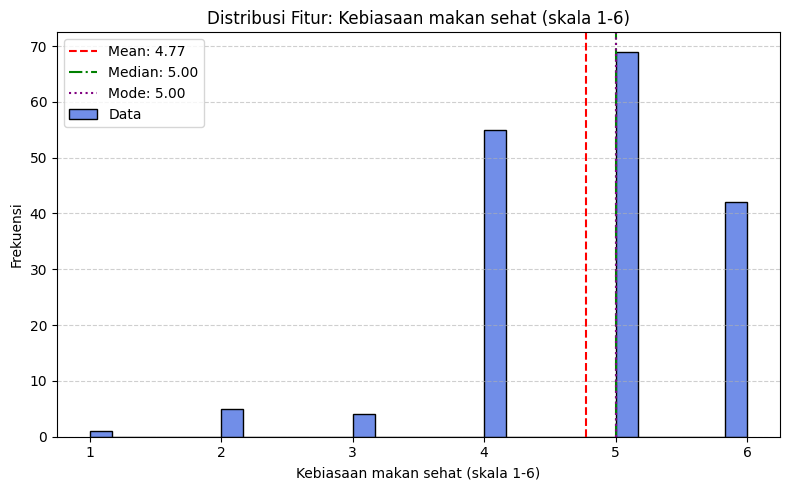

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Daftar fitur numerik yang akan ditampilkan
numeric_features = [
    'IPS Semester sebelumnya',
    'pss_score',  # Tambahkan koma di sini
    'Durasi tidur malam (jam)', # <-- Add comma here
    'Jumlah tugas perminggu',
    'Frekuensi olahraga/minggu',
    'Kebiasaan makan sehat (skala 1-6)',
]

# Visualisasi histogram + garis mean/median/mode untuk tiap fitur
for col in numeric_features:
    data = df[col].dropna()
    mean_val = data.mean()
    median_val = data.median()
    try:
        mode_val = data.mode()[0]
    except IndexError:
        mode_val = np.nan

    plt.figure(figsize=(8, 5))
    sns.histplot(data, bins=30, kde=False, color='royalblue', label='Data')

    # Tambahkan garis vertikal
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-.', label=f'Median: {median_val:.2f}')
    plt.axvline(mode_val, color='purple', linestyle=':', label=f'Mode: {mode_val:.2f}')

    plt.title(f'Distribusi Fitur: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


# Fitur numerik bertipe uang

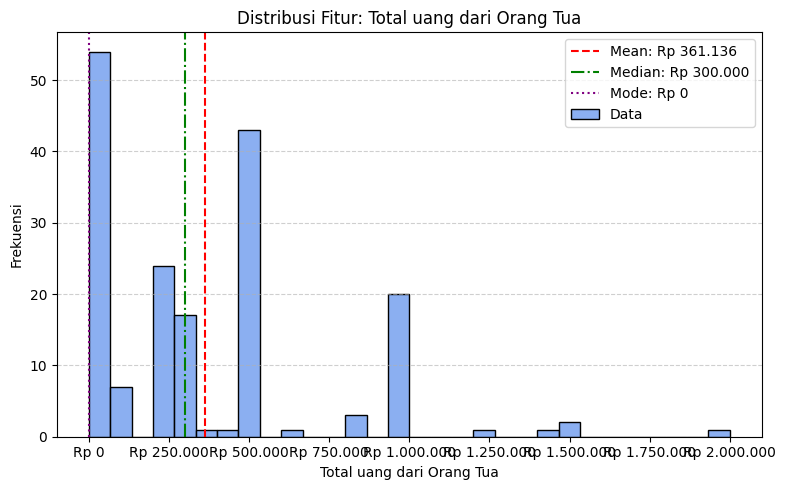

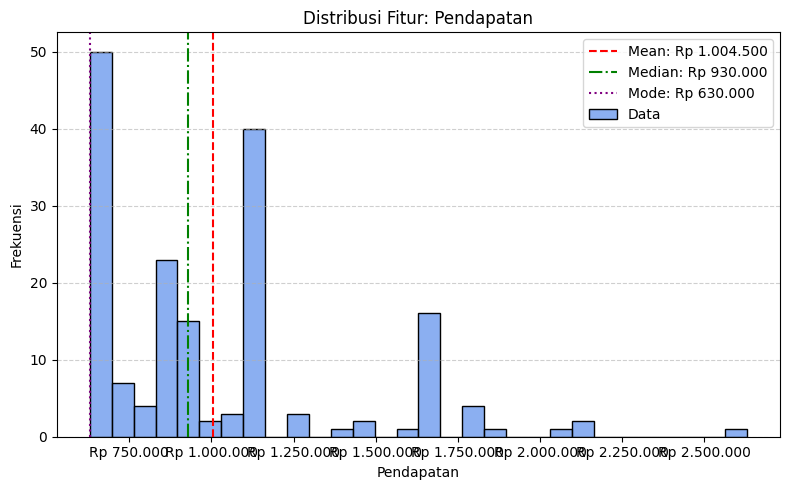

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

def format_rupiah(x, _):
    return f'Rp {int(x):,}'.replace(',', '.')

money_features = [
    'Total uang dari Orang Tua',
    'Pendapatan'
]

for col in money_features:
    data = df[col].dropna()
    mean_val = data.mean()
    median_val = data.median()
    try:
        mode_val = data.mode()[0]
    except IndexError:
        mode_val = np.nan

    plt.figure(figsize=(8, 5))
    sns.histplot(data, bins=30, kde=False, color='cornflowerblue', label='Data')

    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: Rp {mean_val:,.0f}'.replace(',', '.'))
    plt.axvline(median_val, color='green', linestyle='-.', label=f'Median: Rp {median_val:,.0f}'.replace(',', '.'))
    plt.axvline(mode_val, color='purple', linestyle=':', label=f'Mode: Rp {mode_val:,.0f}'.replace(',', '.'))

    plt.gca().xaxis.set_major_formatter(FuncFormatter(format_rupiah))

    plt.title(f'Distribusi Fitur: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


#Visualisasi feature terhadap PSS Score

<ipython-input-7-dbccfbc95e78>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


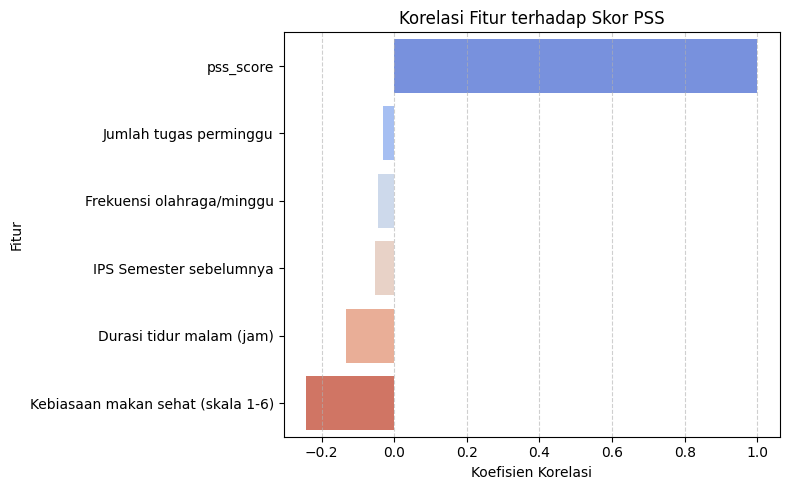

In [ ]:

plt.figure(figsize=(8, 5))
correlation_values = df[numeric_features].corr()['pss_score'].sort_values(ascending=False)

sns.barplot(
    x=correlation_values.values,
    y=correlation_values.index,
    palette='coolwarm'
)

plt.title('Korelasi Fitur terhadap Skor PSS')
plt.xlabel('Koefisien Korelasi')
plt.ylabel('Fitur')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Visualisasi frekuensi untuk stress_level

<ipython-input-8-204e03503f06>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stress_level', data=df, palette='pastel')


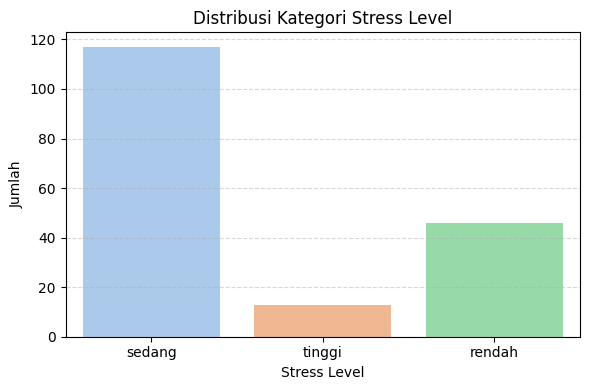

In [ ]:

plt.figure(figsize=(6, 4))
sns.countplot(x='stress_level', data=df, palette='pastel')
plt.title('Distribusi Kategori Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#Preprocessing


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import pandas as pd

df_cleaned = df.copy()

num_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()

exclude_cols = ['pss_score', 'stress_level', 'Cohort', 'Durasi tidur siang (jam)']

num_cols_impute = [col for col in num_cols if col not in exclude_cols]

imputer_num = SimpleImputer(strategy='median')
df_cleaned[num_cols_impute] = imputer_num.fit_transform(df_cleaned[num_cols_impute])

imputer_cat = SimpleImputer(strategy='most_frequent')
df_cleaned[cat_cols] = imputer_cat.fit_transform(df_cleaned[cat_cols])

for col in num_cols_impute:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df_cleaned[col].median()
    df_cleaned[col] = np.where((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound), median, df_cleaned[col])

if 'stress_level' in cat_cols:
    cat_cols.remove('stress_level')
df_encoded = pd.get_dummies(df_cleaned, columns=cat_cols, drop_first=True)


le = LabelEncoder()
df_encoded['stress_level'] = le.fit_transform(df_encoded['stress_level'])

X = df_encoded.drop(columns=['stress_level'])
y = df_encoded['stress_level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['stress_level'] = y.values

pss_keywords = ['seberapa', 'dalam sebulan', 'terakhir', 'Anda merasa', 'tidak mampu']
pss_cols = [col for col in df_scaled.columns if any(keyword.lower() in col.lower() for keyword in pss_keywords)]

df_scaled.drop(columns=pss_cols, inplace=True)

if 'pss_score' in df_scaled.columns:
    df_scaled.drop(columns=['pss_score'], inplace=True)

print("Kolom yang digunakan untuk modeling:")
print(df_scaled.columns.tolist())

print("\nContoh data yang digunakan untuk modeling:")
print(df_scaled.head())

Kolom yang digunakan untuk modeling:
['Umur', 'Cohort', 'IPS Semester sebelumnya', 'Jumlah tugas perminggu', 'Durasi tidur malam (jam)', 'Frekuensi olahraga/minggu', 'Kebiasaan makan sehat (skala 1-6)', 'Total uang dari Orang Tua', 'Pendapatan', 'Jenis Kelamin_Perempuan', 'Organisasi yang diikuti_Humas', 'Organisasi yang diikuti_Lemus', 'Organisasi yang diikuti_Polisi Kadet', 'Organisasi yang diikuti_Rohis', 'Organisasi yang diikuti_Tak ada', 'Organisasi yang diikuti_Tradisi', 'UKM Wajib yang diikuti_Orkestra', 'UKM Wajib yang diikuti_Paduan Suara', 'UKM Wajib yang diikuti_Tidak Mengikuti UKM apapun', 'Kebiasaan meditasi/relaksasi_YA', 'Uang Saku Kadet Unhan_360', 'Uang Saku Kadet Unhan_530', 'Uang Saku Kadet Unhan_6.300.000', 'Uang Saku Kadet Unhan_600', 'Uang Saku Kadet Unhan_600000', 'Uang Saku Kadet Unhan_620', 'Uang Saku Kadet Unhan_620000', 'Uang Saku Kadet Unhan_630', 'Uang Saku Kadet Unhan_630000', 'Uang Saku Kadet Unhan_638', 'Uang Saku Kadet Unhan_640', 'Uang Saku Kadet Unhan

In [ ]:
df_scaled.to_csv('data_scaled.csv', index=False)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

pipelines = {
    "Logistic Regression": Pipeline([
        ('select', SelectKBest(f_classif)),
        ('clf', LogisticRegression(solver='liblinear'))
    ]),
    "Linear SVM": Pipeline([
        ('select', SelectKBest(f_classif)),
        ('clf', LinearSVC(dual=False, max_iter=1000))
    ]),
    "LDA": Pipeline([
        ('select', SelectKBest(f_classif)),
        ('clf', LDA())
    ]),
    "GaussianNB": Pipeline([
        ('select', SelectKBest(f_classif)),
        ('clf', GaussianNB())
    ]),
    "K-Nearest Neighbors": Pipeline([
        ('select', SelectKBest(f_classif)),
        ('clf', KNeighborsClassifier())
    ]),
    "Ridge Classifier": Pipeline([
        ('select', SelectKBest(f_classif)),
        ('clf', RidgeClassifier())
    ]),
    "Passive Aggressive": Pipeline([
        ('select', SelectKBest(f_classif)),
        ('clf', PassiveAggressiveClassifier(max_iter=1000, tol=1e-3))
    ])
}


param_grids = {
    "Logistic Regression": {
        'select__k': [5, 'all'],
        'clf__C': [0.1, 1.0, 10.0]
    },
    "Linear SVM": {
        'select__k': [5, 'all'],
        'clf__C': [0.1, 1.0, 10.0]
    },
    "LDA": {
        'select__k': [5, 'all']
    },
    "GaussianNB": {
        'select__k': [5, 'all']
    },
    "K-Nearest Neighbors": {
        'select__k': [5, 'all'],
        'clf__n_neighbors': [3, 5, 7]
    },
    "Ridge Classifier": {
        'select__k': [5, 'all'],
        'clf__alpha': [0.1, 1.0, 10.0]
    },
    "Passive Aggressive": {
        'select__k': [5, 'all'],
        'clf__C': [0.01, 0.1, 1.0]
    }
}

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

print("=== Nested Cross-Validation Evaluation ===")
results = {}

for name in param_grids:
    print(f"\n-- {name} --")
    pipeline = pipelines[name]
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        scoring='accuracy',
        cv=inner_cv,
        n_jobs=-1
    )

    scores = cross_val_score(grid, X, y, scoring='accuracy', cv=outer_cv, n_jobs=-1)
    print(f"Mean Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")
    results[name] = scores.mean()

if results:
    best_model_name = max(results, key=results.get)
    print(f"\nModel terbaik berdasarkan nested CV: {best_model_name}")
else:
    print("\n Tidak ada model yang dievaluasi.")

=== Nested Cross-Validation Evaluation ===

-- Logistic Regression --
Mean Accuracy: 0.9089 ± 0.0337

-- Linear SVM --
Mean Accuracy: 0.9489 ± 0.0113

-- LDA --
Mean Accuracy: 0.9886 ± 0.0140

-- GaussianNB --
Mean Accuracy: 0.9319 ± 0.0225

-- K-Nearest Neighbors --
Mean Accuracy: 0.9886 ± 0.0140

-- Ridge Classifier --
Mean Accuracy: 0.8521 ± 0.0340

-- Passive Aggressive --
Mean Accuracy: 0.6879 ± 0.1675

✅ Model terbaik berdasarkan nested CV: LDA


In [ ]:
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV

best_pipeline = pipelines[best_model_name]
best_param_grid = param_grids[best_model_name]

final_grid = GridSearchCV(
    estimator=best_pipeline,
    param_grid=best_param_grid,
    scoring='accuracy',
    cv=inner_cv,
    n_jobs=-1
)
final_grid.fit(X, y)
final_model = final_grid.best_estimator_
print(f"Best params after tuning on full data: {final_grid.best_params_}")


Best params after tuning on full data: {'select__k': 5}


In [ ]:
import joblib
import os
from google.colab import files

model_filename = 'final_model.joblib'
joblib.dump(final_model, model_filename)

if os.path.exists(model_filename):
    print(f" Model berhasil disimpan sebagai '{model_filename}'")

    files.download(model_filename)
else:
    print(" Gagal menyimpan model.")


✅ Model berhasil disimpan sebagai 'final_model.joblib'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Tabel Kinerja Model per Kelas:
            precision  recall  f1-score
0 (rendah)       1.00    0.96      0.98
1 (sedang)       0.98    1.00      0.99
2 (tinggi)       1.00    1.00      1.00


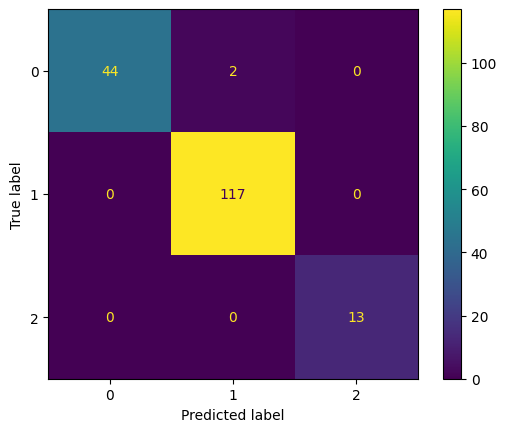

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

final_grid = GridSearchCV(
    estimator=pipelines[best_model_name],
    param_grid=param_grids[best_model_name],
    scoring='accuracy',
    cv=inner_cv,
    n_jobs=-1
)
final_grid.fit(X, y)

y_pred = final_grid.predict(X)

cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(cm).plot()

report = classification_report(y, y_pred, output_dict=True)

df_report = pd.DataFrame(report).transpose()
df_report = df_report.loc[['0', '1', '2'], ['precision', 'recall', 'f1-score']]
df_report.index = ['0 (rendah)', '1 (sedang)', '2 (tinggi)']

print("\nTabel Kinerja Model per Kelas:")
print(df_report.round(2))


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [32 33 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [29 45 53] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [36 40 41 43 48] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, User

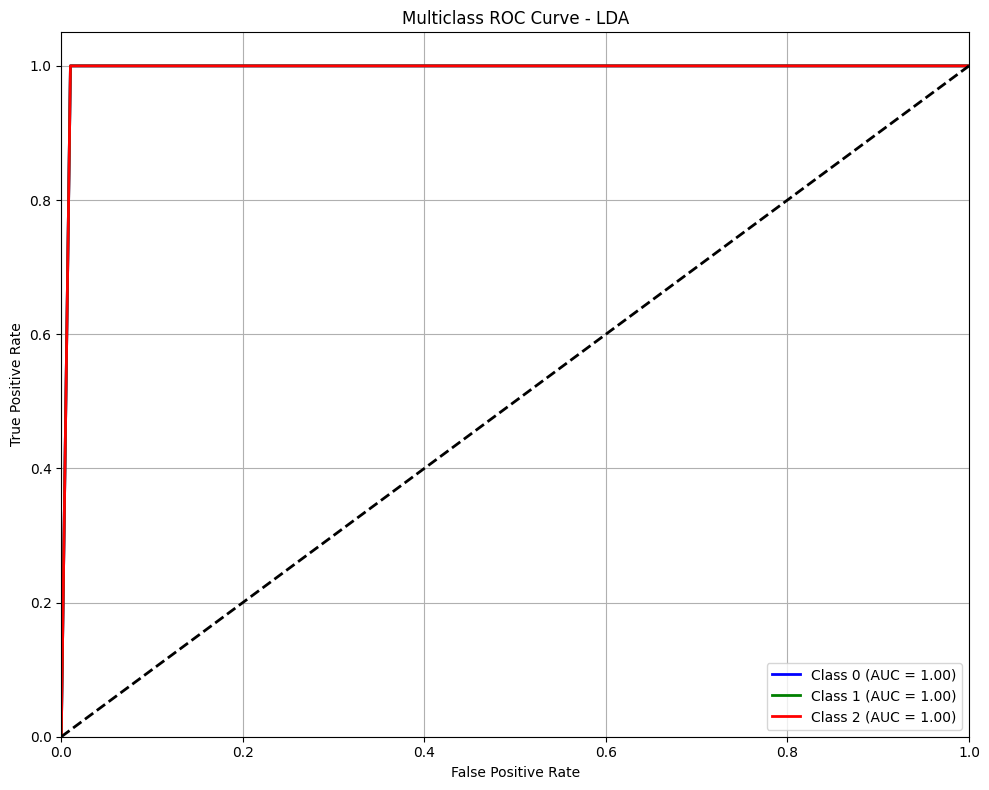

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import numpy as np

classes = np.unique(y)
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mean_fpr = np.linspace(0, 1, 100)

tprs = [ [] for _ in range(n_classes) ]
fprs = [ [] for _ in range(n_classes) ]
aucs = [ [] for _ in range(n_classes) ]

plt.figure(figsize=(10, 8))

for train_idx, test_idx in cv.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]
    y_val_bin = y_bin[test_idx]

    model = clone(final_model)
    model.fit(X_train, y_train)

    if hasattr(model.named_steps['clf'], "predict_proba"):
        probas_ = model.predict_proba(X_val)
    else:
        decision = model.decision_function(X_val)
        probas_ = (decision - decision.min(axis=0)) / (decision.max(axis=0) - decision.min(axis=0) + 1e-8)

    for j in range(n_classes):
        fpr, tpr, _ = roc_curve(y_val_bin[:, j], probas_[:, j])
        roc_auc = auc(fpr, tpr)
        fprs[j].append(fpr)
        tprs[j].append(tpr)
        aucs[j].append(roc_auc)

colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink']
for j in range(n_classes):
    interp_tprs = []
    for k in range(len(tprs[j])):
        interp_tpr = np.interp(mean_fpr, fprs[j][k], tprs[j][k])
        interp_tpr[0] = 0.0
        interp_tprs.append(interp_tpr)
    mean_tpr = np.mean(interp_tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs[j])

    class_label = classes[j] if 'le' in globals() and hasattr(le, 'inverse_transform') else j
    plt.plot(mean_fpr, mean_tpr, color=colors[j % len(colors)],
             label=f'Class {class_label} (AUC = {mean_auc:.2f})', lw=2)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Multiclass ROC Curve - {best_model_name}')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv("/content/TINGKAT STRESS KADET real.csv")

prodi_unique = df['Prodi'].dropna().unique()
prodi_mapping = {i+1: prodi for i, prodi in enumerate(prodi_unique)}

ukm_unique = df['UKM Wajib yang diikuti'].dropna().unique()
ukm_mapping = {i+1: ukm for i, ukm in enumerate(ukm_unique)}

org_unique = df['Organisasi yang diikuti'].dropna().unique()
org_mapping = {i+1: org for i, org in enumerate(org_unique)}

print("Pilih Prodi:")
for k, v in prodi_mapping.items():
    print(f"{k}. {v}")
prodi_input = int(input("Masukkan angka pilihan Prodi: "))
prodi_value = prodi_mapping.get(prodi_input, None)

print("\nPilih UKM Wajib:")
for k, v in ukm_mapping.items():
    print(f"{k}. {v}")
ukm_input = int(input("Masukkan angka pilihan UKM Wajib: "))
ukm_value = ukm_mapping.get(ukm_input, None)

print("\nPilih Organisasi yang diikuti:")
for k, v in org_mapping.items():
    print(f"{k}. {v}")
org_input = int(input("Masukkan angka pilihan Organisasi: "))
org_value = org_mapping.get(org_input, None)

data_screening = {
    'Umur': int(input("Umur: ")),
    'Cohort': input("Cohort: "),
    'Jenis Kelamin': input("Jenis Kelamin (L/P): "),
    'IPS Semester sebelumnya': float(input("IPS Semester sebelumnya: ")),
    'Jumlah tugas perminggu': int(input("Jumlah tugas perminggu: ")),
    'Organisasi yang diikuti': org_value,
    'UKM Wajib yang diikuti': ukm_value,
    'Durasi tidur malam (jam)': float(input("Durasi tidur malam (jam): ")),
    'Frekuensi olahraga/minggu': int(input("Frekuensi olahraga/minggu: ")),
    'Kebiasaan makan sehat (skala 1-6)': int(input("Kebiasaan makan sehat (skala 1-6): ")),
    'Kebiasaan meditasi/relaksasi (Ya/Tidak)': input("Kebiasaan meditasi/relaksasi (Ya/Tidak): "),
    'Total uang dari Orang Tua': float(input("Total uang dari Orang Tua: ")),
    'Uang Saku Kadet Unhan': float(input("Uang Saku Kadet Unhan: ")),
    'Prodi': prodi_value,
}

data_screening['Pendapatan'] = data_screening['Total uang dari Orang Tua'] + data_screening['Uang Saku Kadet Unhan']

input_df = pd.DataFrame([data_screening])

print("\n Data yang akan digunakan:")
print(input_df)


Pilih Prodi:
1. KEDOKTERAN
2. INFORMATIKA
3. TEKNIK SIPIL
4. KIMIA
5. TEKNIK ELEKTRO
6. MATEMATIKA
7. FISIKA
8. RSDA
9. FARMASI
10. SEJARAH MILITER
11. TEKNIK MESIN
12. BIOLOGI


In [ ]:
input_df = input_df.reindex(columns=X.columns, fill_value=0)

input_scaled = scaler.transform(input_df)

pred = final_model.predict(input_scaled)
hasil = le.inverse_transform(pred)[0]

print(f"\nPrediksi Tingkat Stres (Screening Awal): {hasil}")


Prediksi Tingkat Stres (Screening Awal): rendah


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
